# Monte-Carlo Valuation (Multi-Asset)
### Wilson Tobar

### Part a.

#### Import needed packages.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#### Declare variables.

In [2]:
S1 = S2 = 50
R_f = 0.03
T = 1
sigma_1 = 0.20
sigma_2 = 0.30
rho = 0.25
K = 50
n_steps = 12
n_simulations = 100000

#### Time step.

In [3]:
dt = T / n_steps

#### Function to generate correlated normal random numbers.

In [4]:
def generate_correlated_normals(n, rho):
    z1 = np.random.standard_normal(n)
    z2 = rho * z1 + np.sqrt(1 - rho**2) * np.random.standard_normal(n)
    return z1, z2

#### Function to simulate the price paths of a stock using GBM.

In [5]:
def monte_carlo_sim(S0, r, sigma, T, n_steps, n_simulations, correlated_normals):
    dt = T / n_steps
    nudt = (r - 0.5 * sigma**2) * dt
    sigdt = sigma * np.sqrt(dt)
    
    S = np.zeros((n_steps + 1, n_simulations))
    S[0] = S0
    
    for t in range(1, n_steps + 1):
        S[t] = S[t-1] * np.exp(nudt + sigdt * correlated_normals[t-1])

    return S

#### Generate correlated normal random numbers.

In [6]:
z1, z2 = generate_correlated_normals(n_steps * n_simulations, rho)
z1 = z1.reshape((n_steps, n_simulations))
z2 = z2.reshape((n_steps, n_simulations))

#### Simulate possible stock prices.

In [7]:
stock_1 = monte_carlo_sim(S1, R_f, sigma_1, T, n_steps, n_simulations, z1)
stock_2 = monte_carlo_sim(S2, R_f, sigma_2, T, n_steps, n_simulations, z2)

#### Plot possible stock 1 prices.

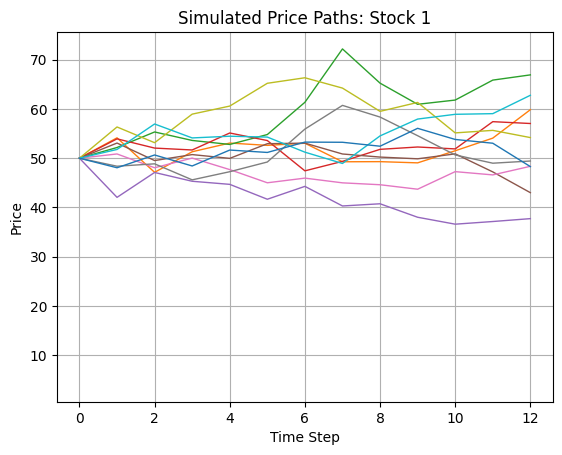

In [8]:
plt.plot(6, 4)
for i in range(10):
    plt.plot(stock_1[:, i], lw=1)
plt.title('Simulated Price Paths: Stock 1')
plt.xlabel('Time Step')
plt.ylabel('Price')
plt.grid(True)

plt.show()

#### Plot possible stock 2 prices.

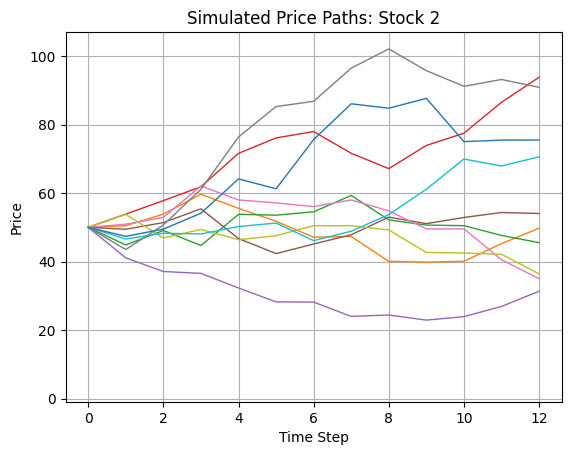

In [9]:
plt.plot(6, 4)
for i in range(10):
    plt.plot(stock_2[:, i], lw=1)
plt.title('Simulated Price Paths: Stock 2')
plt.xlabel('Time Step')
plt.ylabel('Price')
plt.grid(True)

plt.show()

#### Calculate call option payoffs.

In [10]:
payoff_stock_1 = np.maximum(stock_1[-1] - K, 0)
payoff_stock_2 = np.maximum(stock_2[-1] - K, 0)

#### Discount payoffs to present using risk-free rate. Calculate the options value.

In [11]:
discount_factor = np.exp(-R_f * T)
option_value_stock_1 = np.mean(payoff_stock_1) * discount_factor
option_value_stock_2 = np.mean(payoff_stock_2) * discount_factor

print(f"Monte-Carlo Call Option Value for Stock 1: {option_value_stock_1:.4f}")
print(f"Monte-Carlo Call Option Value for Stock 2: {option_value_stock_2:.4f}")

Monte-Carlo Call Option Value for Stock 1: 4.7130
Monte-Carlo Call Option Value for Stock 2: 6.6539


### Part b.

#### Declare variables.

In [12]:
K_individual = 50
K_basket = 100

#### Generate correlated normal numbers.

In [13]:
z1, z2 = generate_correlated_normals(n_steps * n_simulations, rho)
z1 = z1.reshape((n_steps, n_simulations))
z2 = z2.reshape((n_steps, n_simulations))

#### Simulate possible stock outcomes.

In [14]:
stock_1 = monte_carlo_sim(S1, R_f, sigma_1, T, n_steps, n_simulations, z1)
stock_2 = monte_carlo_sim(S2, R_f, sigma_2, T, n_steps, n_simulations, z2)

#### Calculate payoffs.

In [15]:
payoff_stock_1 = np.maximum(stock_1[-1] - K_individual, 0)
payoff_stock_2 = np.maximum(stock_2[-1] - K_individual, 0)

#### Basket option payoff.

In [16]:
payoff_basket = np.maximum((stock_1[-1] + stock_2[-1]) - K_basket, 0)

#### Discount payoffs and calculate options values.

In [17]:
discount_factor = np.exp(-R_f * T)
option_price_stock_1 = np.mean(payoff_stock_1) * discount_factor
option_price_stock_2 = np.mean(payoff_stock_2) * discount_factor
option_price_basket = np.mean(payoff_basket) * discount_factor

print(f"Monte-Carlo Call Option Price for S1: {option_price_stock_1:.4f}")
print(f"Monte-Carlo Call Option Price for S2: {option_price_stock_2:.4f}")
print(f"Monte-Carlo Basket Option Price: {option_price_basket:.4f}")

Monte-Carlo Call Option Price for S1: 4.7177
Monte-Carlo Call Option Price for S2: 6.6827
Monte-Carlo Basket Option Price: 9.4680


### Part c.

#### Defining a list of correlations (rho).

In [18]:
correlations = [0.00, 0.25, 0.50]

#### Function used to calculate price of basket option.

In [19]:
def price_basket_option(rho, plot_bool=False):
    z1, z2 = generate_correlated_normals(n_steps * n_simulations, rho)
    z1 = z1.reshape((n_steps, n_simulations))
    z2 = z2.reshape((n_steps, n_simulations))

    stock_1 = monte_carlo_sim(S1, R_f, sigma_1, T, n_steps, n_simulations, z1)
    stock_2 = monte_carlo_sim(S2, R_f, sigma_2, T, n_steps, n_simulations, z2)

    payoff_basket = np.maximum((stock_1[-1] + stock_2[-1]) - K_basket, 0)

    non_zero_basket = payoff_basket[payoff_basket > 0]

    if plot_bool:
        plt.figure(figsize=(6, 4))
        plt.hist(non_zero_basket, bins=50, color='orchid', edgecolor='black')
        plt.title('Histogram of Non-Zero Basket Option Payoffs')
        plt.xlabel('Payoff')
        plt.ylabel('Frequency')
        plt.grid(True)
        plt.show()

    discount_factor = np.exp(-R_f * T)
    option_price_basket = np.mean(payoff_basket) * discount_factor

    return option_price_basket

#### Calculating basket option value for each correlation.

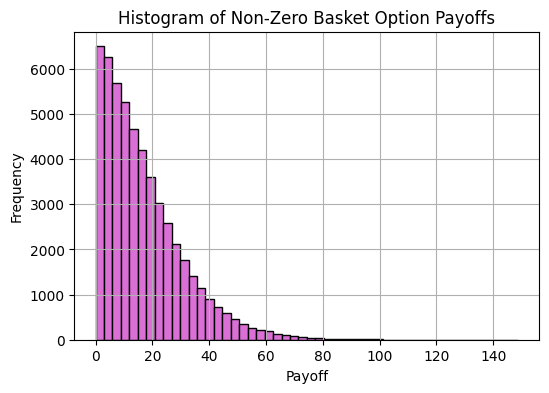

Basket Option Value (rho = 0.00): 8.6108


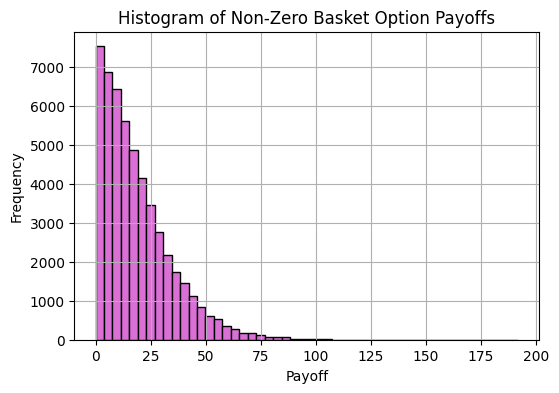

Basket Option Value (rho = 0.25): 9.4000


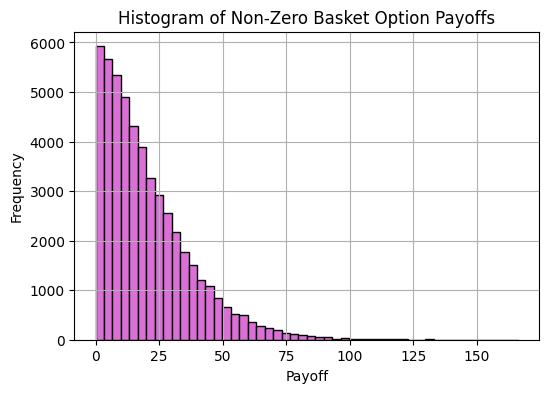

Basket Option Value (rho = 0.50): 10.0700


In [20]:
for rho in correlations:
    price = price_basket_option(rho, True)
    print(f"Basket Option Value (rho = {rho:.2f}): {price:.4f}")

#### Basket Option Value vs. Correlation.

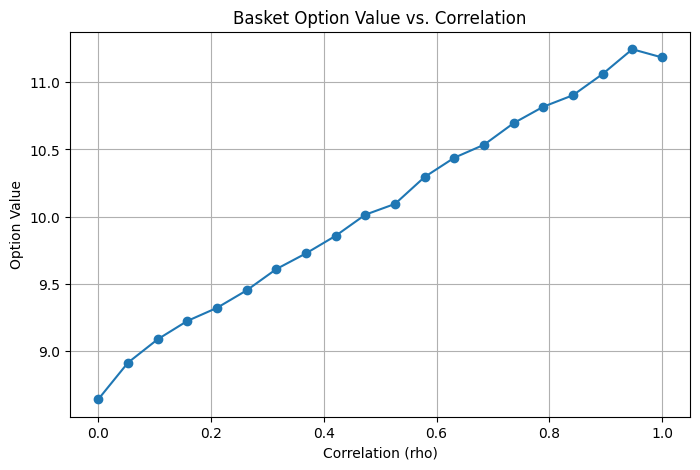

In [21]:
rho_vals = np.linspace(0, 1, 20)
basket_prices = [price_basket_option(rho) for rho in rho_vals]

plt.figure(figsize=(8, 5))
plt.plot(rho_vals, basket_prices, marker='o')
plt.title('Basket Option Value vs. Correlation')
plt.xlabel('Correlation (rho)')
plt.ylabel('Option Value')
plt.grid(True)
plt.show()